In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
import seaborn as sns
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

In [4]:
def zero_one(vals):
    res = (vals-min(vals))/(max(vals)-min(vals))
    return res

In [5]:


#### 44 TNBC pateints, 166 lumA; 30 proteins IMC expression count normalized
imc_tnbc = pd.read_csv('exp/imc_df_count_normalized_all_tnbc.csv')
imc_luma = pd.read_csv('exp/imc_df_count_normalized_all_luma.csv')

###159 TNBC, 599 Luminal A MRNA 28 genes TCGA
tcga_tnbc = pd.read_csv('./exp/final_TCGA_tnbc.csv')
tcga_luma = pd.read_csv('./exp/final_TCGA_luma.csv')

# ### 299 TNBC, 1369 Luminal A 30 genes METABRIC
metab_tnbc = pd.read_csv('./exp/final_METABRIC_tnbc.csv')
metab_luma = pd.read_csv('./exp/final_METABRIC_luma.csv')



In [6]:
imc_tnbc = imc_tnbc.iloc[:,2:]      ### preprocessing IMC
imc_luma = imc_luma.iloc[:,2:]      ### preprocessing IMC

tcga_tnbc = tcga_tnbc.iloc[:,2:]   #### preprocessing TCGA
tcga_luma = tcga_luma.iloc[:,2:]    #### preprocessing TCGA

metab_tnbc = metab_tnbc.iloc[:,2:] #### preprocessing metabric
metab_luma = metab_luma.iloc[:,2:] #### preprocessing metabric


In [7]:
#imc_tnbc.shape, metab_tnbc.shape


imc_tnbc.shape, imc_luma.shape, tcga_tnbc.shape, tcga_luma.shape, metab_tnbc.shape, metab_luma.shape

((44, 30), (166, 30), (159, 29), (599, 28), (299, 30), (1369, 30))

In [8]:
from unioncom import UnionCom


In [9]:
uc = UnionCom.UnionCom(output_dim=28,epoch_pd=2000,epoch_DNN=0,distance_mode='geodesic')

In [10]:
#data1 = imc_tnbc.to_numpy()
data1 = imc_luma.to_numpy()

#data4 = tcga_tnbc.to_numpy()
data4 = tcga_luma.to_numpy()

#data5 = metab_tnbc.to_numpy()
data5 = metab_luma.to_numpy()

In [11]:
#data1.shape,data4.shape
data1.shape,data4.shape, data5.shape

((166, 30), (599, 28), (1369, 30))

In [12]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
ss_scaler = preprocessing.StandardScaler()


norm_data1 = min_max_scaler.fit_transform(data1) ### protein count normalized
norm_data4 = min_max_scaler.fit_transform(data4) #tcga
norm_data5 = min_max_scaler.fit_transform(data5) #metabric


# norm_data1 = data1  #notnormalized
# norm_data5 = data5  #notnormalized

In [13]:
print(norm_data1.shape, #norm_data2.shape,norm_data3.shape,
norm_data4.shape,
norm_data5.shape,
#norm_data6.shape,norm_data7.shape,norm_data8.shape
     )

(166, 30) (599, 28) (1369, 30)


In [14]:
#data_focus = norm_data4  ### TCGA
data_focus = norm_data5  ### Metabric

In [15]:
print(norm_data1.shape, data_focus.shape)

integrated_data = uc.fit_transform(dataset=[norm_data1,data_focus]) 
part_1 = integrated_data[0]
part_2 = integrated_data[1]


(166, 30) (1369, 30)
use random seed: 666
Shape of Raw data
Dataset 0: (166, 30)
Dataset 1: (1369, 30)
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
use device: cuda:0
epoch:[100/2000] err:3.5884 alpha:30.9010
epoch:[200/2000] err:0.4808 alpha:4.1401
epoch:[300/2000] err:0.0644 alpha:0.5547
epoch:[400/2000] err:0.0086 alpha:0.0743
epoch:[500/2000] err:0.0023 alpha:0.0195
epoch:[600/2000] err:0.0066 alpha:0.0570
epoch:[700/2000] err:0.0119 alpha:0.1021
epoch:[800/2000] err:0.0179 alpha:0.1542
epoch:[900/2000] err:0.0244 alpha:0.2106
epoch:[1000/2000] err:0.0312 alpha:0.2691
epoch:[1100/2000] err:0.0381 alpha:0.3282
epoch:[1200/2000] err:0.0448 alpha:0.3868
epoch:[1300/2000] err:0.0514 alpha:0.4439
epoch:[1400/2000] err:0.0578 alpha:0.4990
epoch:[1500/2000] err:0.0638 alpha:0.5516
epoch:[1600/2000] err:0.0695 alpha:0.6016
epoch:[1700/2000] err:0.0748 alpha:0.6486
epoch:[1800/2000] err:0.0798 alpha:0.6928
epoch:[1900/2000] err:0.0844 alpha:0.7340
ep

In [17]:
part_2

array([[ 0.36153778, -0.30100936,  0.2996869 , ...,  0.72374016,
        -0.68772036,  0.06682216],
       [-0.68346155, -0.67895883,  1.8951999 , ...,  0.2784649 ,
         1.1332761 , -0.18267149],
       [-0.5372129 , -0.04747119,  0.7013832 , ...,  0.17103139,
         0.7747244 , -0.27774936],
       ...,
       [-0.02923527, -0.47411406,  0.57105476, ...,  0.14217365,
         0.28772807,  0.18072477],
       [-0.20472792, -0.2990132 ,  0.68383807, ..., -0.09546613,
         0.2963415 ,  0.00811956],
       [-0.02845999, -1.0364122 ,  0.8697953 , ..., -0.03658225,
         0.48020646,  0.74776614]], dtype=float32)

In [18]:
### only runs after running joint embedding
cor_pairs = uc.match(dataset=[norm_data1,data_focus])

---------------------------------
Find correspondence between Dataset 1 and Dataset 2
use device: cuda:0
epoch:[100/2000] err:3.5884 alpha:30.9010
epoch:[200/2000] err:0.4808 alpha:4.1401
epoch:[300/2000] err:0.0644 alpha:0.5547
epoch:[400/2000] err:0.0086 alpha:0.0743
epoch:[500/2000] err:0.0023 alpha:0.0195
epoch:[600/2000] err:0.0066 alpha:0.0570
epoch:[700/2000] err:0.0119 alpha:0.1021
epoch:[800/2000] err:0.0179 alpha:0.1542
epoch:[900/2000] err:0.0244 alpha:0.2106
epoch:[1000/2000] err:0.0312 alpha:0.2691
epoch:[1100/2000] err:0.0381 alpha:0.3282
epoch:[1200/2000] err:0.0448 alpha:0.3868
epoch:[1300/2000] err:0.0514 alpha:0.4439
epoch:[1400/2000] err:0.0578 alpha:0.4990
epoch:[1500/2000] err:0.0638 alpha:0.5516
epoch:[1600/2000] err:0.0695 alpha:0.6016
epoch:[1700/2000] err:0.0748 alpha:0.6486
epoch:[1800/2000] err:0.0798 alpha:0.6928
epoch:[1900/2000] err:0.0844 alpha:0.7340
epoch:[2000/2000] err:0.0887 alpha:0.7724
Finished Matching!


In [21]:
cor_pairs[0].shape

(166, 1369)

In [25]:
pat_match = cor_pairs[0]

In [26]:
pat_match.shape

(166, 1369)

In [27]:
norm_pat_match = pat_match 
#norm_pat_match = min_max_scaler.fit_transform(pat_match)  #only for luma metabric bcz it overfits

In [1]:
############## cohorts
#good_tnbc = [7,14, 19, 21, 30, 71, 75, 83, 84, 102, 103, 107, 128, 135, 142, 148, 159] #use
#not_cohort_good_tnbc = [33, 49, 56, 60, 61, 78, 97, 99, 106, 108, 120, 126, 151, 152, 156, 160, 163, 172, 174, 181, 196, 208, 209, 216, 220, 233, 245]
## so not cohort
#good_tnbc_newid = [0,1,2,3,4,10,11,13,14,17,18,20,24,25,26,27,31]






bad_luma =       [3, 10, 22, 23, 27, 64, 80, 96, 100, 117, 130, 132, 154, 200, 238, 240, 243, 254] #use
bad_luma_newid = [3,  9, 16, 17, 18, 42, 51, 63,  70,  75,  82,  83,  95, 123, 148, 150, 153, 161]
#not_cohort_bad_luma = [0, 1, 2, 4, 5, 6, 8, 9, 12, 15, 16, 17, 18, 20, 28, 29, 31, 32, 35, 37, 38, 39, 40, 41, 45, 47, 48, 50, 51, 52, 53, 54, 55, 58, 59, 62, 63, 66, 67, 68, 70, 73, 74, 77, 79, 82, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 98, 101, 104, 105, 109, 110, 111, 112, 114, 116, 119, 121, 122, 123, 127, 129, 134, 136, 137, 138, 141, 143, 144, 145, 146, 150, 153, 157, 158, 161, 164, 165, 166, 167, 170, 171, 176, 177, 178, 179, 182, 183, 184, 185, 186, 187, 188, 189, 190, 192, 193, 194, 198, 199, 202, 203, 205, 206, 213, 214, 215, 217, 218, 219, 221, 222, 224, 225, 226, 227, 228, 229, 231, 232, 234, 235, 236, 237, 239, 241, 242, 244, 246, 247, 249, 250, 251, 252, 255, 256, 257, 258]


In [40]:
clus_in = bad_luma_newid

In [37]:
pat_match

array([0.00074772, 0.0006141 , 0.0005926 , ..., 0.00060249, 0.00059658,
       0.00060478], dtype=float32)

In [41]:
matched = []   

##99% TCGA TNBC;
##99.5% match TCGA lumA; high cutoff bcz of more patients in Metabric dataset and lumA cohort;

##99% match metabric TNBC; 
##99.5% match metabric - lumA high cutoff bcz of more patients in Metabric dataset and lumA cohort;

thre = 0.995


for index in clus_in:
    match_vec = norm_pat_match[index]
    matched_index = np.where(match_vec > thre*max(match_vec))
    matched.append(matched_index[0])
    flat_list = [item for sublist in matched for item in sublist]
new_flat_list = list(set(sorted(flat_list)))

In [42]:
len(new_flat_list)

492

In [43]:
new_flat_list

[0,
 9,
 11,
 12,
 14,
 17,
 18,
 21,
 24,
 30,
 31,
 32,
 40,
 43,
 49,
 50,
 55,
 59,
 60,
 63,
 70,
 77,
 78,
 79,
 82,
 85,
 87,
 91,
 96,
 97,
 107,
 109,
 111,
 115,
 117,
 118,
 119,
 127,
 132,
 133,
 136,
 137,
 138,
 144,
 145,
 150,
 156,
 160,
 165,
 166,
 167,
 168,
 170,
 176,
 178,
 183,
 184,
 185,
 186,
 192,
 199,
 201,
 202,
 204,
 206,
 208,
 215,
 220,
 223,
 224,
 226,
 231,
 235,
 239,
 240,
 242,
 248,
 250,
 252,
 253,
 254,
 262,
 264,
 268,
 269,
 270,
 271,
 274,
 275,
 278,
 281,
 283,
 284,
 286,
 291,
 296,
 298,
 305,
 306,
 309,
 310,
 311,
 321,
 330,
 334,
 336,
 337,
 339,
 341,
 342,
 345,
 351,
 352,
 354,
 357,
 359,
 362,
 363,
 370,
 371,
 372,
 374,
 379,
 380,
 381,
 382,
 383,
 385,
 389,
 390,
 391,
 393,
 395,
 396,
 402,
 403,
 404,
 406,
 407,
 408,
 412,
 415,
 416,
 417,
 422,
 423,
 425,
 427,
 431,
 432,
 450,
 451,
 454,
 458,
 465,
 472,
 473,
 475,
 484,
 485,
 489,
 491,
 493,
 496,
 497,
 499,
 500,
 503,
 504,
 507,
 510,
 511,


In [1170]:
print(
    #sorted(new_flat_list), 
    len(sorted(new_flat_list)))

73


In [32]:
cohort = sorted(new_flat_list)

In [34]:
#### KM Plot

m, n = norm_pat_match.shape
#m, n = 259, 1904

# cohort = sorted(new_flat_list)
# not_cohort = [item for item in range(0,n) if item not in cohort]

m,n

(166, 1369)

In [35]:
not_cohort = [item for item in range(n) if item not in cohort]

In [36]:
len(cohort), len(not_cohort)

(492, 877)

In [39]:
# cohort = [item for item in sorted(new_flat_list) if item in tnbc_indexes]
# len(cohort)

In [40]:
# not_cohort = [item for item in tnbc_indexes if item not in cohort ]
# len(not_cohort)

In [41]:
# print([item-1 for item in [11, 27, 97, 103, 170, 226, 239]])

In [42]:
len(cohort), len(not_cohort)

(492, 877)

In [1179]:
# from matplotlib.pyplot import figure

# figure(figsize=(16, 12), dpi=80)
# #plt.imshow(norm_pat_match[clus_7,: ], cmap='Reds', interpolation='nearest')
# plt.imshow(norm_pat_match[np.ix_(clus_7, flat_list) ], cmap='Reds', interpolation='nearest')
# plt.show()

In [1180]:
# id_match = np.argmax(min_max_scaler.fit_transform(pat_match), axis=1, out=None)

In [1181]:
# cohort

In [1182]:
# ### for R
# print('cohort', [item+1 for item in cohort])
# print('notcohort', [notitem+1 for notitem in not_cohort])

In [1183]:
#print(sorted(time_event_616['SampleID'].values.tolist()))

In [1184]:
#print(sorted(time_event_1093[time_event_1093['patient'].isin(time_event_616['SampleID'].values.tolist())]['patient'].values.tolist()))

In [1185]:
#time_event = time_event[time_event['patient'].isin(patlist_1093)]

In [44]:
# time_event_tcga

#### time event analysis

#time_event_tcga = pd.read_csv('ekdm_final_TCGA_clinical_TNBC.csv')
#time_event_tcga = pd.read_csv('ekdm_final_TCGA_clinical_luma.csv')

#time_event_metabric = pd.read_csv('metabric_clin_tnbc.csv')
time_event_metabric = pd.read_csv('./cli/metabric_clin_luma.csv')



In [1270]:
time_event_tcga.shape, time_event_metabric.shape

((599, 8), (299, 10))

In [1271]:

if data_focus.shape == norm_data4.shape: #TCGA
    time  = time_event_tcga['time'].values
    event = time_event_tcga['event'].values
    p = time_event_tcga['Patient ID'].values
elif data_focus.shape == norm_data5.shape: #Metabric
    time  = time_event_metabric['time'].values
    event = time_event_metabric['event'].values 
    p = time_event_metabric['Patient ID'].values

In [1272]:
# #KM for our data

# cohort = clus_7
# not_cohort = [item for item in range(0,259) if item not in cohort]

In [1273]:
len(time), len(event)

(599, 599)

In [1274]:
time_ = time[cohort]
time_other = time[not_cohort]

event_ = event[cohort]
event_other = event[not_cohort]




In [1275]:
print(cohort)

[1, 3, 6, 19, 33, 36, 41, 46, 55, 56, 57, 63, 65, 66, 71, 79, 87, 91, 99, 103, 105, 135, 163, 168, 170, 171, 215, 220, 230, 241, 242, 243, 256, 261, 270, 271, 272, 286, 290, 292, 301, 302, 308, 311, 317, 318, 324, 329, 332, 344, 358, 363, 371, 391, 392, 397, 430, 431, 432, 484, 488, 490, 507, 510, 518, 530, 538, 550, 554, 558, 569, 570, 582]


In [1276]:
## metabric tnbc bad  [6, 10, 17, 32, 33, 50, 52, 60, 68, 72, 73, 78, 82, 84, 87, 94, 97, 98, 107, 111, 112, 114, 124, 125, 126, 129, 132, 136, 142, 144, 149, 159, 169, 172, 177, 180, 181, 185, 190, 194, 196, 197, 211, 213, 217, 218, 219, 222, 229, 234, 244, 245, 246, 256, 259, 264, 269, 276, 278, 282, 283, 288, 295, 296]

In [1277]:
time_

array([ 48.52,   8.51,  48.06,  92.41,  80.22,  71.94,  24.7 ,  20.5 ,
        18.59,  19.32,  48.42,  20.24,  52.43,  47.62,  36.2 ,  26.94,
        31.7 ,  29.53,  14.68,  14.65,  10.71,  30.98,  90.64,  32.42,
        16.29,  14.82,  61.99,  70.37, 140.44, 103.78,  97.6 ,  98.26,
       118.5 , 105.19,  63.57,  38.14,  39.36,  37.19,  21.68,  72.17,
        77.92,  67.05,  15.64,  78.94,  81.77,  32.56,  63.34,  52.92,
        20.37,  44.78, 120.53,  36.76,  21.75,  13.47,  21.12,  13.99,
        14.42,  48.  ,  16.39,  28.42,  60.94,  54.14,  32.03,  23.88,
        13.24,  14.42,  31.27,  66.33,  62.42,  13.27,  22.37,   2.1 ,
        19.71])

In [1278]:
event_

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [1285]:
# list(zip(cohort, time_, event_))

In [1280]:
len(time_), len(time_other), len(event_), len(event_other)

(73, 526, 73, 526)

In [1281]:
# from lifelines import CoxPHFitter
# cph = CoxPHFitter()

if data_focus.shape == norm_data4.shape: #TCGA
    dataset_name = "TCGA"
    #data_df = tcga_tnbc.copy()
    data_df = tcga_luma.copy()
    data_df['time'] = time
    data_df['event']= event
elif data_focus.shape == norm_data5.shape: #Metabric
    dataset_name = "METABRIC"
    #data_df = metab_tnbc.copy()
    #data_df = metab_luma.copy()
    data_df['time'] = time
    data_df['event']= event
    
    

results = logrank_test(time_, time_other, event_, event_other)
results = results.p_value




print(results)


0.028391667311612273


In [1282]:
# #### our data

# dataset_name = 'OURS'


# clus_7 = [3,56, 60, 100, 106, 108, 160, 174]
# cohort = clus_7
# not_cohort = [item for item in range(0,259) if item not in cohort]

# time = time_event_ours['time'].values
# event= time_event_ours['event'].values

# time_7 = time[cohort]
# time_other = time[not_cohort]

# event_7 = event[cohort]
# event_other = event[not_cohort]


# data_df = p259_cellfeats
# data_df['time'] = time
# data_df['event']= event


# cph = CoxPHFitter(penalizer=0.1)
# cph.fit(data_df, 'time', 'event' )
# results = logrank_test(time_7, time_other, event_7, event_other)
# results = results.p_value
# cindex, cph.concordance_index_

# print('Concordance Index: ', cindex, 'Logrank-pval',results )

In [1283]:
# #### TNBC



# fig, ax = plt.subplots(ncols=1, figsize=(10,8))

# kmf = KaplanMeierFitter()
# for i in range(1,3):
#     if i==1:
#         kmf.fit(time_,event_,label='Good TNBC equivalent ')#+'(n='+str(len(time_7))+')')
#     elif i==2:
#         kmf.fit(time_other,event_other,label='Other TNBC Patients')#+'(n='+str(len(time_other))+')')
#     kmf.plot(show_censors=True,ci_show=False)
    

# ax.set_ylim(-0.1, 1.10)
# #ax.set_ylim(-10, 280)
# #ax.set_xticks(np.arange(0, 380, 20))
# ax.set_xlabel('Overall Survival (months)', fontsize = 14)
# ax.set_ylabel('Probability of survival', fontsize = 14)
# ax.set_title('Dataset: '+ dataset_name+#' ; CI: '+str('%.3g'%(cindex)) + 
#              '; p-value: ' +str('%.3g'%(results)), fontsize=16)

NameError: name 'KaplanMeierFitter' is not defined

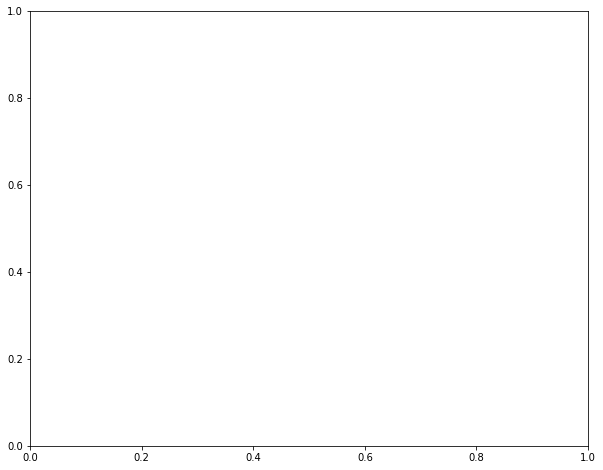

In [11]:
### LUMA


fig, ax = plt.subplots(ncols=1, figsize=(10,8))

kmf = KaplanMeierFitter()
for i in range(1,3):
    if i==1:
        kmf.fit(time_,event_,label='Poor Luminal A equivalent ')#+'(n='+str(len(time_7))+')')
    elif i==2:
        kmf.fit(time_other,event_other,label='Other Luminal A Patients')#+'(n='+str(len(time_other))+')')
    kmf.plot(show_censors=True,ci_show=False)
    

ax.set_ylim(-0.1, 1.10)
#ax.set_ylim(-10, 280)
ax.set_xticks(np.arange(0, max(time), 20))
ax.set_xlabel('Overall Survival (months)', fontsize = 14)
ax.set_ylabel('Probability of survival', fontsize = 14)
ax.set_title('Dataset: '+ dataset_name+#' ; CI: '+str('%.3g'%(cindex)) + 
             '; p-value: ' +str('%.3g'%(results)), fontsize=16)

In [1268]:
print(not_cohort)

[0, 2, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 37, 38, 39, 40, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 62, 64, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 164, 165, 166, 167, 169, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 216, 217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 244, 245, 246, 247, 248, 24

In [385]:
# pdimp = pd.read_csv('ours/imc_df_count_normalized_1.csv')


In [386]:
# pdimp = pdimp.iloc[:,1:]

In [387]:
# pdimp

In [388]:
# t = [6, 10, 11, 28, 48, 63, 67, 76, 79, 81, 95, 96, 107, 118, 122, 138, 166, 173, 221, 225, 241, 243, 264, 290, 365, 388, 389, 394, 430, 431, 435, 452, 484, 494, 514, 527, 528, 533, 538, 555, 563, 577, 582, 590, 592, 598, 599, 610, 614, 625, 656, 715, 735, 760, 764, 779, 780, 781, 801, 822, 824, 856, 860, 882, 889, 917, 940, 944, 945, 948, 952, 958, 973, 974, 986, 988, 1042]

In [389]:
# print([item-1 for item in t])

In [1187]:
##### 